<center>
<img src="https://raw.githubusercontent.com/FUlyankin/ekenam_grand_research/master/images/cover.png">
</center>


# <center> Иканам гранд рисёрч </center>
## <center> Часть третья: Паблики. Исследуем тематики пабликов. </center> 


Проект **Иканам гранд рисёрч** реализуется [Иканам стьюдентс коммьюнити,](https://vk.com/ikanam)
в частности [вот этим парнем по имени Филипп.](https://vk.com/ppilif)  Если вы нашли ошибку или у вас есть предложения, замечания, деньги, слава или женщины, можно ему написать. Весь говнокод, использованный в исследовании распостраняется по лицензии [Creative Commons CC BY-NC-SA 4.0.](https://creativecommons.org/licenses/by-nc-sa/4.0/) Его можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу рисёрча.](https://github.com/FUlyankin/ekenam_grand_research) 


In [1]:
import warnings     # Игнорирование варнингов
warnings.filterwarnings("ignore") 

In [2]:
import numpy as np     # Нумпай для векторов 
import pandas as pd    # Пандас для табличек 
# Округлять в табличках значения до второго знака
pd.set_option('precision', 2)           

# Пакеты для графииков
import matplotlib
import matplotlib.pyplot as plt                             
import seaborn as sns
plt.style.use('ggplot')   # Правильный стиль графиков   

# Пакет для красивых циклов. При желании его можно отключить. Тогда из всех циклов придётся 
# удалять команду tqdm_notebook.
from tqdm import tqdm_notebook   # подробнее: https://github.com/tqdm/tqdm

import pickle  # Пакет для подгрузки и сохранения бинарников 

In [3]:
%matplotlib inline  

# 1. Тематические профили

Ура! У нас есть не просто паблики, а паблики разбитые по темам. Вполне логично предположить, что индивидуальность человека довольно сильно выражается через его подписки. Сварим по нашим кластеризациям новые переменные для нашей будущей модели.  Как мы ранее договорились, мы будем работать с кластеризацией на 30 тем. Вспомним названия тем. 

In [4]:
themes_30 = {
 0 : 'концерт, фестиваль',  1 : 'мода, одежда',      2 : 'поездки, путишествия',  3 : 'тренировки',
 4 : 'рецепты, еда',        5 : 'мусор-1',           6 : 'квалификация, тренинг', 7 : 'интернет, девайсы',
 8 : 'торговля, реклама',   9 : 'мусор-2',           10: 'телек, спорт, сериалы', 11: 'машины',
 12: 'бизнес, стартапы',    13: 'ваниль, чувства, пафос',  14: 'языки',           15: 'самобытность, история',
 16: 'фото, кастинги',      17: 'мемы',              18: 'искусство',             19: 'мусор-3',
 20: 'кино, мусор-4',       21: 'тело, красота',     22: 'музыка',                23: 'нерусские группы',
 24: 'украина, мусор-5',    25: 'студенты, вузы',    26: 'мемы, дота, игры',      27: 'подслушано, анон, курсач',
 28: 'новости, государство',29: 'ислам' 
}

Для начала подгрузим инфомрациб о том кто на что подписан и информацию по темам, на которые мы раздробили все наши группы. 

In [5]:
# Кто на какой паблик подписан 
with open('vk_data_group_v18-12-17', 'rb') as f:
    group_list = pickle.load(f)

uid_groups = { }
for item in group_list:
    k,v = item.items()
    uid_groups[k[1]] = v[1]
    
# Основная информация по каждому id 
with open('ikanam_info_v18-12-17', 'rb') as f:
    ikanam_info = pickle.load(f)
    
# Информация по кластеризации на 30 тем 
# Информация по темам
with open('vk_lda30_them_info', 'rb') as f:
    th_res_30 = pickle.load(f)
# Информация по группам
with open('vk_lda30_group_info', 'rb') as f:
    gr_res_30 = pickle.load(f)
    
# Список юзеров, которые участвуют в исследовании
# Делаем из словаря лист из id 
users_id = list(ikanam_info.keys())
users_name = [ikanam_info[ud]['name'] for ud in users_id]

Вспомним что именно в каком из словарей лежит. 

In [6]:
print(uid_groups[22261760],'\n')   # Словарь с информаией по группам для каждого id
print(ikanam_info[22261760],'\n')  # Словарь с информацией по каждому id 
print(gr_res_30[58556421], '\n')   # Словарь с информацией о том какие темы в какой группе
print(th_res_30.keys())            # Слова для каждой темы и группы, для которых эти темы наивероятны

[56106344, 29833734, 93330757, 27932995, 23315499, 69348268, 49439086, 32127188, 84926122, 66687279, 58213205, 152624627, 27429141, 31480508, 52537634, 128849843, 23992557, 38255673, 85620209, 77843142, 41429002, 30022666, 36887891, 105829519, 101921413, 37488722, 37119411, 70493648, 105390071, 44655165, 34274053, 106985077, 78355455, 57090014, 44770386, 60394797, 135275127, 30547362, 51194172, 41272644, 38744784, 36840461, 4070797, 51880996, 40148170, 109349119, 38415798, 68319550, 12248221, 105999460, 38683579, 39009769, 88820676, 30637940, 81439813, 39966877, 1163441, 38265075, 28627911, 48540538, 42968101, 73367771, 31545597, 30086880, 50757433, 41182482, 134063159, 86958486, 26610299, 121839809, 29049670, 36941068, 38860424, 58332103, 31709664, 30553269, 28129783, 26339923, 104360781, 106033821, 107898192, 77109534, 78301923, 130552184, 39830322, 101621324, 36147615, 119148123, 26800822, 80410546, 91704773, 44759043, 42533142, 32520651, 76256400, 84843298, 47656539, 52399827, 6889

Итак, у каждого человека есть подписки. У каждого паблика есть темы. Можно взят конкретного юзера, пройтись по всем его пабликам, просмотреть какая тема встречается чаще, а какая реже и в итоге получить для каждого юзера тематический профиль. 

In [7]:
def grops_profile(user_uid, gr_res, clusters = 30, verbouse = 0, uid_groups=uid_groups):
    group_list = uid_groups[user_uid]
    # Создали вектор для тематического профиля юзера
    theme_profile = np.zeros(clusters)
    
    err = 0
    # Проходимся по всем группам
    for gr in group_list:
        try:
            # вытаскиваем инфу и сортируем по значению индексов  
            cur_gr =  sorted(gr_res[gr]['themes'], key=lambda w: w[0], reverse=True) 
            ind = [cgr[0] for cgr in cur_gr]  # делаем вектор с номерами тем
            prob = np.array([cgr[1] for cgr in cur_gr]) # делаем вектор с весами 
            theme_profile[ind] += prob        # Увеличиваем соответствующие веса
        except:
            err += 1 # В списках есть куча удаленных групп, которые мы не отфильтровали
            
    # Нормируем к единице
    if verbouse: print('Доля битых групп:', err/len(group_list))
    theme_profile = theme_profile / np.sum(theme_profile)
    return theme_profile

In [8]:
grops_profile(22261760, gr_res_30, verbouse = 1)

Доля битых групп: 0.0


array([ 0.09607031,  0.01210903,  0.01542251,  0.01810941,  0.06120237,
        0.00479819,  0.00921205,  0.02534095,  0.06165572,  0.05526238,
        0.03860784,  0.00996515,  0.03595969,  0.2204674 ,  0.02330021,
        0.01315548,  0.03071888,  0.07194124,  0.03685789,  0.00406206,
        0.00967489,  0.01543139,  0.04539115,  0.00693676,  0.01378913,
        0.01805151,  0.00804335,  0.02334739,  0.0146614 ,  0.00045426])

Мы можем находить тематический профиль для каждого человека. Визуализируем это чудо!

In [9]:
def publ_profile(user, users_id =users_id, users_name = users_name, th_res_30 = th_res_30, themes_30 = themes_30,
                 wr_v = False, gr_v = False):
    # Пытаемся понять что нам ввели id или имя 
    if isinstance(user, int):
        i = users_id.index(user)
    else:
        i = users_name.index(user)
    uid = users_id[i]
    name = users_name[i]
    
    # Строим профиль
    prof = grops_profile(uid, gr_res_30)
    
    # Сортируем профиль 
    sorted_prof = sorted(list(zip(prof, list(range(30)))), key=lambda w: w[0], reverse=True)   
    
    print('Тематический профиль для', name, ':', '\n')
    
    # рисуем картинку
    sns.set(font_scale=2)
    plt.subplots(figsize=(30, 40))
    
    prof = np.array([pr[0] for pr in sorted_prof]).reshape(1,30)
    them = [themes_30[pr[1]] for pr in sorted_prof]
    sns.heatmap(prof, square=True, annot=True, fmt=".2f", linewidths=0.1, 
                 cmap="YlGnBu", cbar=False, yticklabels='', xticklabels=them )
    
    # Выдаём ключевые слова для самых важных тем
    for pr in sorted_prof[:5]:
        cr_pr = pr[1]
        if wr_v: print('Ключевые слова для темы', themes_30[cr_pr], ':')
        if wr_v: print(', '.join([wr[0] for wr in th_res_30[cr_pr]['words'][:20]]), '\n')
        if gr_v: print('Ключевые группы для темы', themes_30[cr_pr], ':')
        if gr_v: print(', '.join([wr[1] for wr in th_res_30[cr_pr]['groups'][:10]]), '\n')
    
    pass

Тематический профиль для Осипов Семён : 

Ключевые группы для темы интернет, девайсы :
O'Reilly Books, VK API Change Log, DevLog | веб, геймдев, программирование, Подготовка к ЕГЭ от 60 баллов и выше. Школа ЕГЭ, ЯПрограммист | Python, Библиотека программиста, //Я - Программист, Программирование ITmozg:, Программист, EGE-GO - ОГЭ КДР ВПР Ответы (Запасной паблик) 

Ключевые группы для темы новости, государство :
Камень в лесу, Коммерсантъ Власть, Евгений Фёдоров :: официальная страница, ИА Красная Весна, Федеральное агентство новостей, Нижневартовск, Анатолий Шарий | Новости | Украина | Sharij.net, Антимайдан-коммент, Военное обозрение, Защищать Россию 

Ключевые группы для темы квалификация, тренинг :
Повышение квалификации охрана труда. Красноярск, Повышение квалификации эко. безопасность, Повышение квалификации эко. безопасность Новосиб, Повышение квалификации изыскателей в Новосибирск, Повышение квалификации проектировщиков. Новосиб, Повышение квалификации строителей в Новосибирске, 

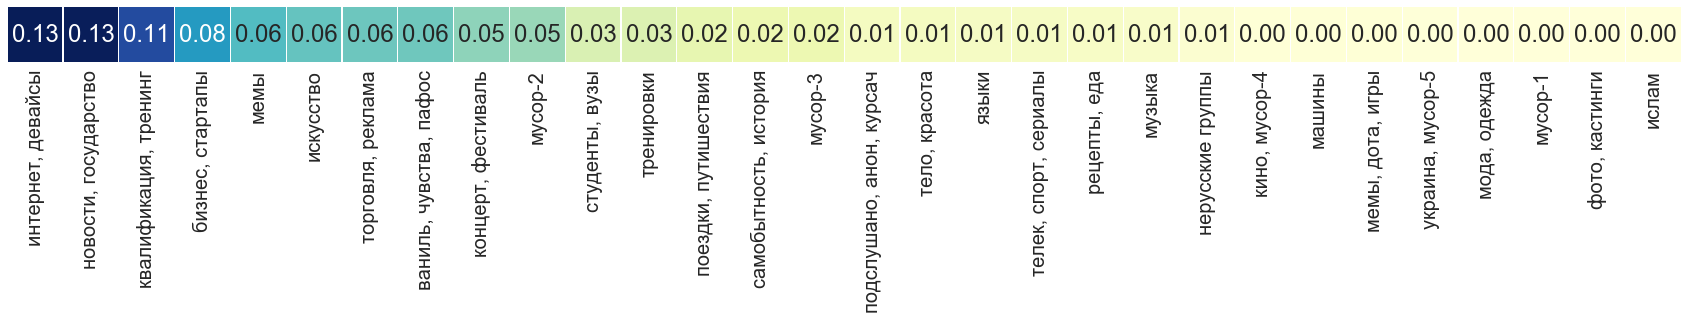

In [10]:
publ_profile('Осипов Семён', gr_v=1)

Тематический профиль для Островский Кирилл : 

Ключевые слова для темы тренировки :
пулловер, мышцы, тренировки, стёганый, упражнения, тела, ноги, мышц, организм, организма, упражнение, следует, крови, воды, системы, тренировок, питания, уровень, пищи, упражнений 

Ключевые слова для темы ваниль, чувства, пафос :
женщина, женщины, отношения, любить, мужчина, тобой, однажды, чувство, мужчины, можешь, человеком, женщин, человеку, чувства, будь, тело, боль, твой, думать, читать 

Ключевые слова для темы концерт, фестиваль :
вход, билеты, мастер, ждем, москвы, концерт, адрес, санкт, приходите, праздник, стоимость, подарки, фестиваль, новогодние, метро, подробнее, сентября, фестиваля, состоится, билет 

Ключевые слова для темы бизнес, стартапы :
бизнес, бизнеса, цели, брэнды, клиентов, будете, цель, идея, правило, результат, идеи, успеха, брэндов, план, способ, процесс, решения, информацию, уровень, заниматься 

Ключевые слова для темы мемы :
мама, говно, знаешь, папа, родители, домой, паре

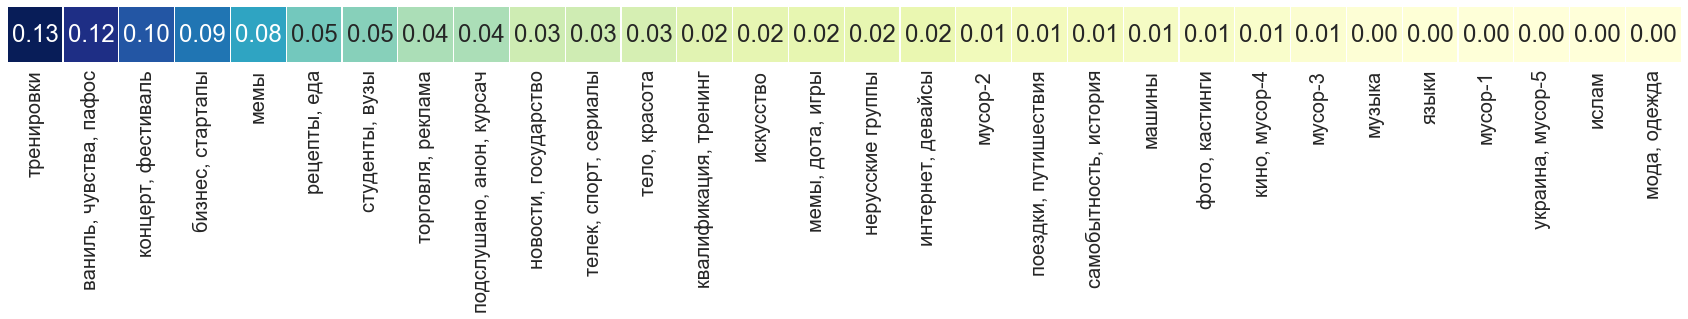

In [11]:
publ_profile('Островский Кирилл', wr_v=1)

Тематический профиль для Тишин Александр : 

Ключевые слова для темы искусство :
книга, века, фильм, искусства, роман, искусство, художник, книг, книге, книгу, смерти, кино, wall, автора, культуры, философии, фильма, картины, художника, теории 

Ключевые слова для темы квалификация, тренинг :
бизнес, компаний, компания, рынка, бизнеса, рынке, млрд, банка, кейс, рынок, банк, пулом, скупке, эталонных, привлечённые, вконтач, редиректа, затёртой, business, роста 

Ключевые слова для темы концерт, фестиваль :
вход, билеты, мастер, ждем, москвы, концерт, адрес, санкт, приходите, праздник, стоимость, подарки, фестиваль, новогодние, метро, подробнее, сентября, фестиваля, состоится, билет 

Ключевые слова для темы студенты, вузы :
студентов, студенты, состоится, регистрация, университета, программы, обучения, развития, российской, факультета, образования, ранхигс, мероприятия, школы, курса, участники, федерации, апреля, курс, института 

Ключевые слова для темы интернет, девайсы :
курс, google,

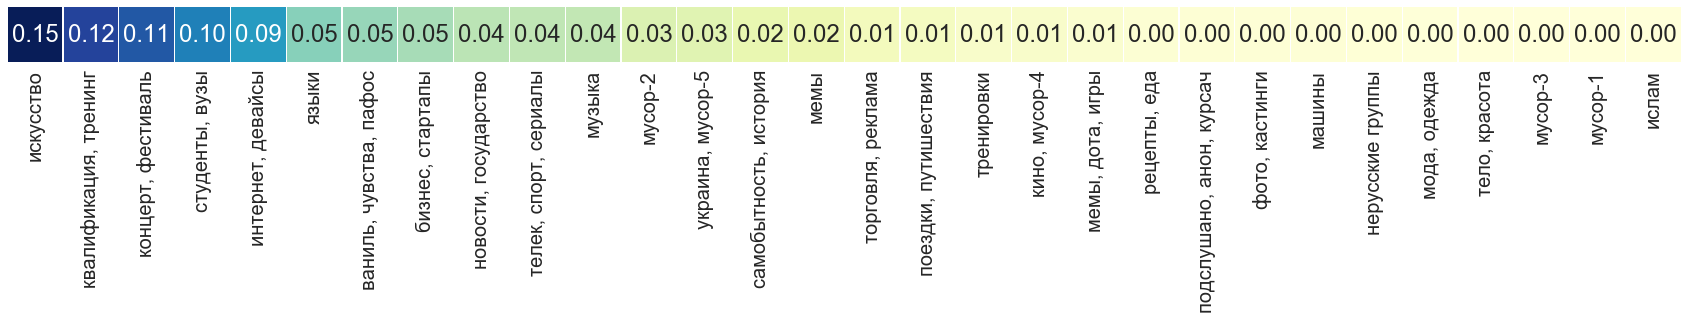

In [12]:
publ_profile('Тишин Александр', wr_v=1)

Напишем функцию, которая понимает для каждого пользователя какая тема из какиех групп сложилась

In [13]:
# Функция, которая выясняет какие группы в какие темы входят для конкретного человека и конкретной темы 
def uid_theme(user, theme, gamma = 0.2, users_id =users_id, users_name = users_name, 
                 uid_groups = uid_groups, gr_res_30 =  gr_res_30 ):
    # Пытаемся понять что нам ввели id или имя 
    if isinstance(user, int):
        i = users_id.index(user)
    else:
        i = users_name.index(user)
    uid = users_id[i]
    name = users_name[i]
    
    # Находим номер темы по имени
    for item in themes_30.items():
        if item[1] == theme:
            theme = item[0]
    
    # Проходимся по всем группам юзера и ищем у них нужный нам профиль 
    grps = [ ]
    for group in uid_groups[uid]:
        try:
            s = [item[1] for item in gr_res_30[group]['themes'] if  item[0] == theme]
            if (len(s) > 0)&(s[0] > gamma):
                grps.append((gr_res_30[group]['name'], s[0]))    
        except:
            pass
        
    return sorted(grps, key=lambda w: w[1], reverse=True) 

In [14]:
uid_theme('Тишин Александр', 'искусство', gamma = 0.1)

[('Театр. Книги.', 0.69687223),
 ('Art Traffic. Культура. Искусство', 0.68292743),
 ('Музей современного искусства «Гараж»', 0.56140447),
 ('О фотографии', 0.53545946),
 ('Горький. О книгах и чтении', 0.52829945),
 ('Arzamas', 0.5153411),
 ('Artplay Media', 0.51434034),
 ('АРТГИД \\ ARTGUIDE', 0.49237734),
 ('Электротеатр Станиславский', 0.46669069),
 ('The Art Newspaper Russia', 0.4606472),
 ('ВИНЗАВОД. ЦЕНТР СОВРЕМЕННОГО ИСКУССТВА', 0.37276232),
 ('Современный театр', 0.36171284),
 ('Петербургская Филармония им. Шостаковича', 0.33985457),
 ('Лучшие видеолекции', 0.33459136),
 ('The Met: Live in HD (Россия)', 0.29505265),
 ('Deep Space', 0.28223938),
 ('E:\\music\\neoclassical', 0.25870413),
 ('Academic Art', 0.24293698),
 ('ЦИМ (Центр имени Мейерхольда)', 0.24198116),
 ('PhD Comics', 0.24134566),
 ('КАРО.Арт', 0.2353459),
 ('Плохие идеи для рисёча', 0.20091656),
 ('Большой балет в кино', 0.18519537),
 ('Вопросы игры Что? Где? Когда?', 0.178349),
 ('Beat Film Festival', 0.17636622),
 

In [15]:
uid_theme('Тишин Александр', 'квалификация, тренинг', gamma = 0.2)

[('FinExecutive', 0.76686192),
 ('NES Banking &amp; Finance Society', 0.66312921),
 ('Plekhanov Investment Banking Club', 0.63982421),
 ('Московская Биржа', 0.58805311),
 ('Societe Financiers | SF', 0.56195182),
 ('Bain &amp; Company', 0.55065441),
 ('Collapse', 0.53798908),
 ('MGIMO Case Club | Кейс-клуб МГИМО', 0.51709759),
 ('ЦМФ', 0.50469315),
 ('Management Consulting Club', 0.49511254),
 ('Экономика РФ', 0.45599663),
 ('UpGrade', 0.40175205),
 ('The Foundation', 0.35009587),
 ('McKinsey Business Diving 2017', 0.34565735),
 ('Фонд Первое Поколение', 0.28103209),
 ('Тинькофф Банк', 0.24575067),
 ('Epistemia', 0.2286188),
 ('Национальная платформа открытого образования', 0.22843872)]

In [16]:
uid_theme('Тишин Александр', 'тренировки', gamma = 0.01)

[('Deep Space', 0.20993723),
 ('Плохие идеи для рисёча', 0.078124672),
 ('Современный театр', 0.065100759),
 ('Epistemia', 0.046843365),
 ('Курилка ЦэБэ', 0.033333335),
 ('Вопросы игры Что? Где? Когда?', 0.023156945),
 ('Лучшие видеолекции', 0.017007248),
 ('Deep|Bayes', 0.015882483),
 ('Шедевры фотографии - Фотографы и модели', 0.0157171),
 ('Внешний Вид', 0.0144171),
 ('Универсиада по эконометрике', 0.012770025),
 ('Иван Фефелов | стихи', 0.012129759),
 ('Хабрахабр', 0.012046883),
 ('Gravity Falls | Гравити Фолз', 0.01111043),
 ('стихи Сопрано', 0.010653907),
 ('I Like Trip Клуб путешествий ВШЭ и МФТИ', 0.010610334),
 ('Исчисляй', 0.010017959)]

# 2. Профили по всем людям 

Теперь пройдёмся по всем людям и сохраним их тематические профили в словарик. Будем иметь в виду, что для части юзеров у нас в группах стоят `NaN`. Из-за этого они не обработаются. 

In [17]:
group_list[40]

{'groups': nan, 'uid': 422131817}

In [18]:
profiles_30 = { }

user_err = 0
for item in tqdm_notebook(users_id):
    try:
        profiles_30[item] = grops_profile(item, gr_res_30)
    except:
        #print(item['uid'])
        user_err += 1
print('Не обработалось', user_err, 'юзера')

HBox(children=(IntProgress(value=0, max=706), HTML(value='')))


Не обработалось 34 юзера


In [19]:
df_30 = pd.DataFrame.from_dict(profiles_30,orient='index')
df_30 = df_30.reset_index()
df_30.columns = ['uid'] + ['30pub_clust_' + str(i) for i in range(30)]
df_30.head()

,uid,30pub_clust_0,30pub_clust_1,30pub_clust_2,30pub_clust_3,30pub_clust_4,30pub_clust_5,30pub_clust_6,30pub_clust_7,30pub_clust_8,...,30pub_clust_20,30pub_clust_21,30pub_clust_22,30pub_clust_23,30pub_clust_24,30pub_clust_25,30pub_clust_26,30pub_clust_27,30pub_clust_28,30pub_clust_29
0,22261760,0.10,1.21e-02,1.54e-02,0.02,6.12e-02,4.80e-03,9.21e-03,0.03,6.17e-02,...,9.67e-03,1.54e-02,0.05,6.94e-03,1.38e-02,0.02,8.04e-03,2.33e-02,0.01,4.54e-04
1,295389188,0.11,4.35e-03,2.00e-02,0.03,6.04e-03,3.09e-03,7.98e-03,0.01,1.07e-01,...,1.24e-02,4.39e-02,0.01,1.48e-02,1.27e-03,0.03,5.66e-02,4.40e-02,0.02,1.27e-03
2,174168070,0.10,2.03e-03,9.04e-03,0.04,3.91e-02,5.54e-03,2.27e-02,0.02,2.85e-02,...,8.42e-03,6.34e-03,0.07,3.94e-03,3.24e-03,0.01,3.41e-02,1.08e-02,0.10,0.00e+00
3,137312267,0.11,3.69e-03,2.61e-02,0.02,4.18e-02,4.40e-03,2.63e-02,0.03,5.39e-02,...,6.22e-03,7.23e-02,0.04,3.70e-03,8.21e-03,0.04,2.29e-02,1.93e-02,0.03,2.47e-04
4,47220748,0.09,2.67e-04,2.49e-02,0.02,2.41e-03,2.72e-03,1.02e-01,0.07,3.43e-03,...,1.79e-03,6.28e-04,0.03,0.00e+00,0.00e+00,0.14,1.47e-02,6.74e-03,0.13,0.00e+00


В конечном итоге мы будем использовать эту табличку с тематическими профилями при построении модели. 

# 3. Самые близкие к вам люди по темам

Напишем функцию, которая будет искать самых близких по темам людей по отношению к заданному.

In [20]:
from numpy.linalg import norm
from scipy.spatial.distance import cosine

# Для меня и Сёмы:
print('Евклидово расстояние:', norm(profiles_30[7560796] - profiles_30[6045249], ord=2))
print('Косинусное расстояние:', cosine(profiles_30[7560796],profiles_30[6045249]))

Евклидово расстояние: 0.174635228327
Косинусное расстояние: 0.163252819256


Найдём матрицу из расстояний 

In [21]:
cur_uids = list(profiles_30.keys())
n = len(cur_uids)
R = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        #rho = norm(profiles_30[cur_uids[i]] - profiles_30[cur_uids[j]], ord=2)
        rho = cosine(profiles_30[cur_uids[i]],profiles_30[cur_uids[j]])
        # Борьба с NA
        if np.isnan(rho):
            R[i,j] = 100
        elif rho == 0:
            R[i,j] = 100
        else:
            R[i,j] = rho
R

array([[ 100.        ,    0.1669921 ,    0.3060757 , ...,    0.20930906,
           0.11497498,    0.14525662],
       [   0.1669921 ,  100.        ,    0.21292879, ...,    0.32676966,
           0.19260082,    0.1646863 ],
       [   0.3060757 ,    0.21292879,  100.        , ...,    0.42297887,
           0.31230183,    0.313302  ],
       ..., 
       [   0.20930906,    0.32676966,    0.42297887, ...,  100.        ,
           0.36634838,    0.37457133],
       [   0.11497498,    0.19260082,    0.31230183, ...,    0.36634838,
         100.        ,    0.19030522],
       [   0.14525662,    0.1646863 ,    0.313302  , ...,    0.37457133,
           0.19030522,  100.        ]])

Самые похожие люди (наименьшее расстояние) 

In [22]:
users_name = [ikanam_info[dd]['name'] for dd in profiles_30.keys()]

ppls = np.where(R == np.min(R))
print(ppls)
print('Похожи:', users_name[ppls[0][0]], 'и', users_name[ppls[0][1]])
print('Расстояние:', np.min(R))

(array([ 82, 234]), array([234,  82]))
Похожи: Исхакова Фарида и Сидорук Дарья
Расстояние: 0.0107999639063


In [23]:
sec_mx = np.partition(R.flatten(),2)[2]
ppls = np.where(R == sec_mx)
print(ppls)
print('Похожи:', users_name[ppls[0][0]], 'и', users_name[ppls[0][1]])
print('Расстояние:', sec_mx)

(array([161, 581]), array([581, 161]))
Похожи: Петрова Диана и Mirzayanov Ilnaz
Расстояние: 0.0108570188796


In [24]:
sec_mx = np.partition(R.flatten(),4)[4]
ppls = np.where(R == sec_mx)
print(ppls)
print('Похожи:', users_name[ppls[0][0]], 'и', users_name[ppls[0][1]])
print('Расстояние:', sec_mx)

(array([ 31, 250]), array([250,  31]))
Похожи: Полякова Александра и Макагонова Татьяна
Расстояние: 0.0144647471739


In [25]:
sec_mx = np.partition(R.flatten(),6)[6]
ppls = np.where(R == sec_mx)
print(ppls)
print('Похожи:', users_name[ppls[0][0]], 'и', users_name[ppls[0][1]])
print('Расстояние:', sec_mx)

(array([434, 499]), array([499, 434]))
Похожи: Брянцева Мария и Khurtina Katya
Расстояние: 0.014961979526


In [26]:
sec_mx = np.partition(R.flatten(),8)[8]
ppls = np.where(R == sec_mx)
print(ppls)
print('Похожи:', users_name[ppls[0][0]], 'и', users_name[ppls[0][1]])
print('Расстояние:', sec_mx)

(array([104, 466]), array([466, 104]))
Похожи: Голубева Танюшка и Семедова Наиля
Расстояние: 0.0156933602494


Функция для поиска самых похожих на тебя

In [27]:
def likeme_profile(user, profiles_30 = profiles_30, R = R, num=15):
    # Пытаемся понять что нам ввели id или имя 
    users_id = list(profiles_30.keys())
    users_name = [ikanam_info[dd]['name'] for dd in users_id]
    
    if isinstance(user, int):
        i = users_id.index(user)
    else:
        i = users_name.index(user)
    uid = users_id[i]
    name = users_name[i]
    nearest_prof = sorted(list(zip(R[:,i],users_name)), key=lambda w: w[0])
    print('Самые близкие к', name, 'профили:')
    for item in nearest_prof[:num]:
        print(round(item[0],2), item[1])
        
    #print('\n Самые далёкие от', name, 'профили:')
    #for item in nearest_prof[-(num+11):-11]:
    #    print(round(item[0],2), item[1])

likeme_profile('Петрова Диана')

Самые близкие к Петрова Диана профили:
0.01 Mirzayanov Ilnaz
0.05 Потапова Мария
0.07 Голованова Лиза
0.08 Okonor Brayan
0.1 Данильченко Леонид
0.1 Ульянкин Филипп
0.1 Малышев Яша
0.12 Россошанский Алексей
0.13 Зюзько Кристина
0.15 Фёдоров Артур
0.15 Царёв Алексей
0.15 Коннова Анастасия
0.18 Шакуров Тимур
0.19 Гайнулина Алина
0.19 Шелякин Антон


In [28]:
likeme_profile('Макагонова Татьяна')

Самые близкие к Макагонова Татьяна профили:
0.01 Полякова Александра
0.02 Кристя Кристина
0.02 Самотканова Виктория
0.03 Ахметзянова Дарья
0.03 Евдокимова Алина
0.03 Сакович Дарья
0.03 Буханцев Никита
0.03 Беляева Елена
0.03 Анискина Лера
0.03 Аксенова Аня
0.03 Гришкина Катя
0.03 Бубен Валерия
0.04 Казарян Диана
0.04 Мм Ааа
0.04 Ponkina Daria


In [29]:
likeme_profile('Ульянкин Филипп')

Самые близкие к Ульянкин Филипп профили:
0.04 Данильченко Леонид
0.06 Потапова Мария
0.07 Mirzayanov Ilnaz
0.07 Малышев Яша
0.08 Шелякин Антон
0.09 Голованова Лиза
0.09 Осипов Сергей
0.1 Россошанский Алексей
0.1 Петрова Диана
0.11 Евстафьев Сергей
0.11 Pervin Pervin
0.11 Кожевников Егор
0.12 Царёв Алексей
0.12 Фоломеев Александр
0.13 Pereboykina Katerina


# 4. Кластеры по интересам 

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=40, random_state=0).fit(df_30.drop('uid',axis=1).dropna())

In [31]:
kmeans_names = np.array([ikanam_info[ud]['name'] for ud in df_30.dropna()['uid']])

def cluster_by_name(name):
    for i in range(40):
        if name in kmeans_names[np.where(kmeans.labels_ == i)]:
            s = i
    return kmeans_names[np.where(kmeans.labels_ == s)]

cluster_by_name('Shilov Kirill')

array(['Иванов Игорь', 'Фокин Никита', 'Филимонов Алексей',
       'Shilov Kirill', 'Закирова Вероника', 'Мартынов Саня',
       'Косарев Владимир', 'Билаонова Виктория', 'Соловьёв Роман'],
      dtype='<U23')

# 5. Тематические топы разных курсов 

Тематический профиль эконома: 

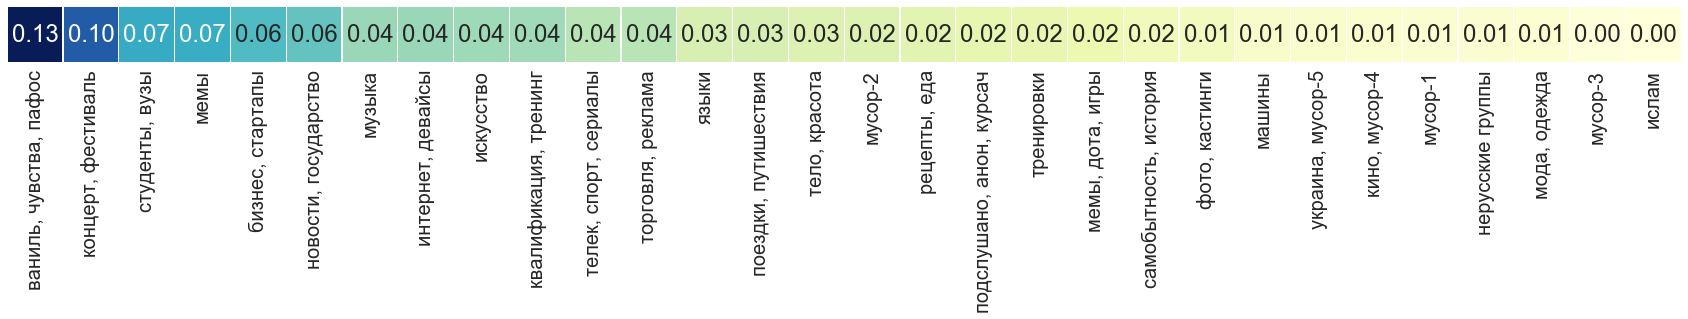

In [62]:
cur_df = df_30.dropna().drop('uid', axis=1)
prof = np.array(cur_df.sum(axis=0)/cur_df.shape[0])
sorted_prof = sorted(list(zip(prof, list(range(30)))), key=lambda w: w[0], reverse=True)  

# рисуем картинку
sns.set(font_scale=2)
plt.subplots(figsize=(30, 40))

prof = np.array([pr[0] for pr in sorted_prof]).reshape(1,30)
them = [themes_30[pr[1]] for pr in sorted_prof]
sns.heatmap(prof, square=True, annot=True, fmt=".2f", linewidths=0.1, 
             cmap="YlGnBu", cbar=False, yticklabels='', xticklabels=them )

Тематические профили курсов: 

In [35]:
courses_data = pd.read_csv('simple_data.csv', sep = '\t')

int_data = courses_data[['uids','year']]

# Выбираем для каждого набора множества из id 
cours_12 = int_data[int_data.year == 2012].uids.get_values()
cours_13 = int_data[int_data.year == 2013].uids.get_values()
cours_14 = int_data[int_data.year == 2014].uids.get_values()
cours_15 = int_data[int_data.year == 2015].uids.get_values()
cours_16 = int_data[int_data.year == 2016].uids.get_values()
cours_17 = int_data[int_data.year == 2017].uids.get_values()

df_30_cp = df_30.copy()
df_30_cp = df_30_cp.set_index('uid')

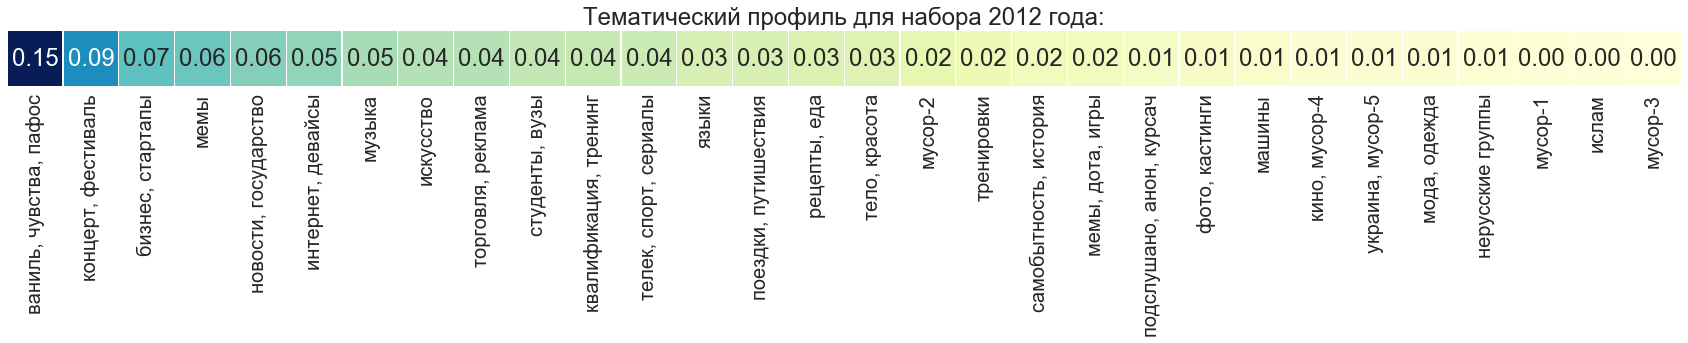

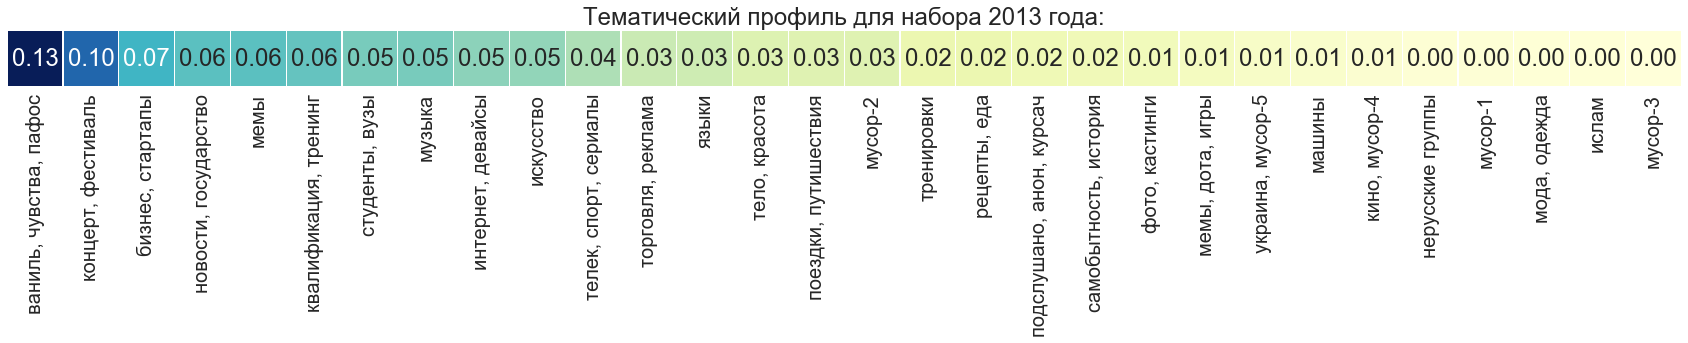

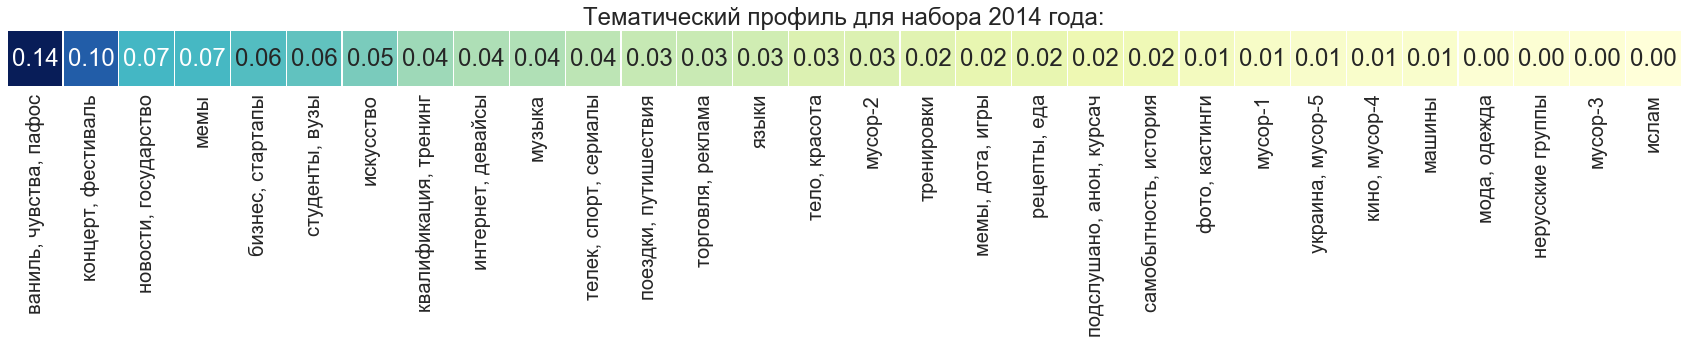

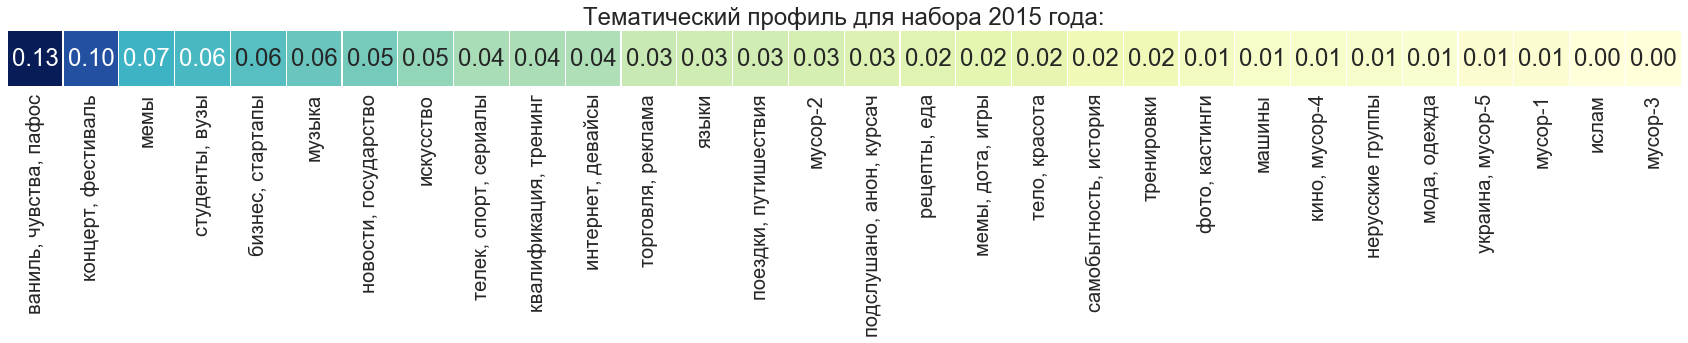

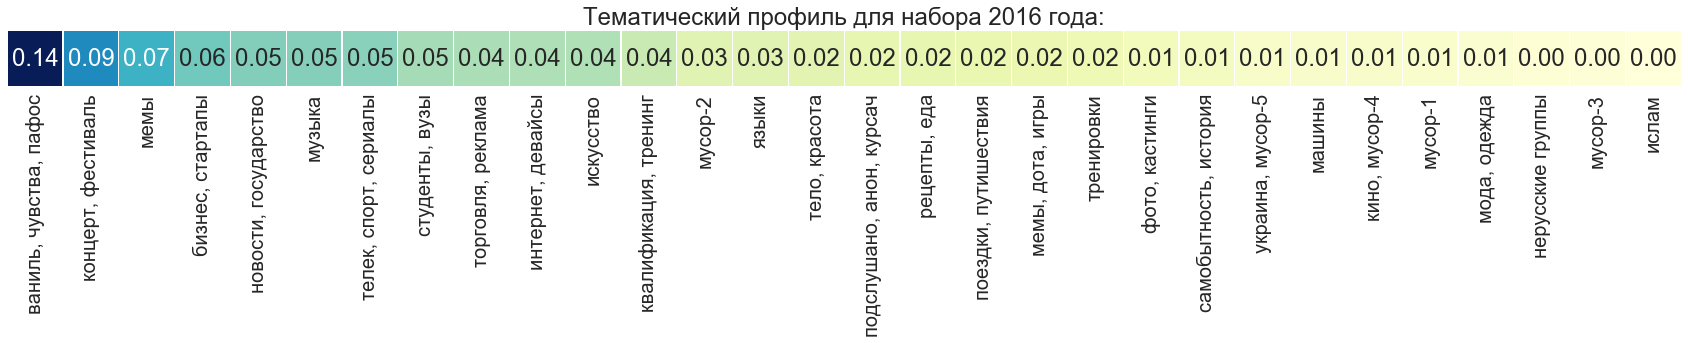

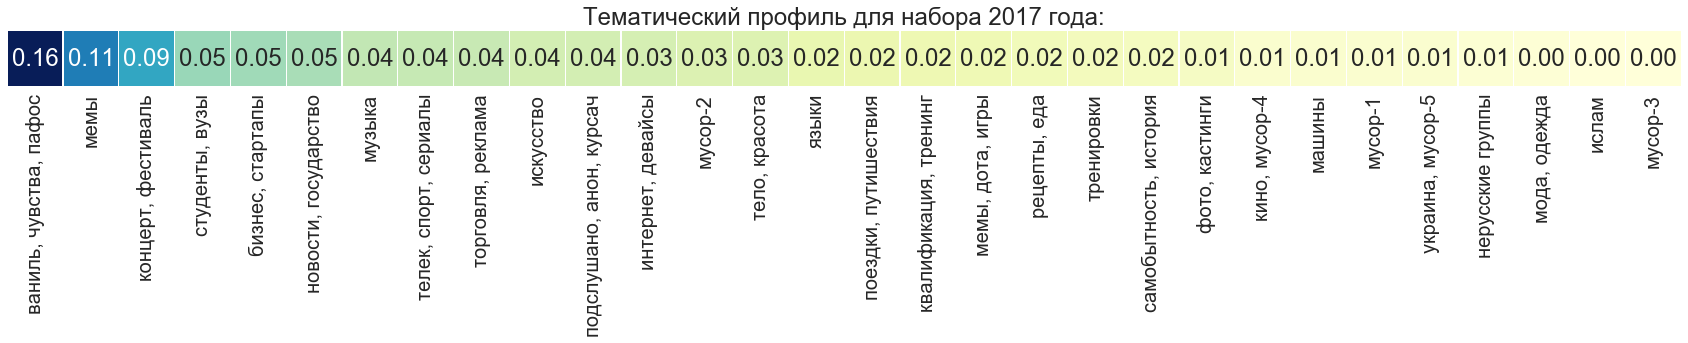

In [57]:
nm = 2011
for course in [cours_12,cours_13, cours_14, cours_15, cours_16, cours_17]:
    nm += 1
    cur_df = df_30_cp.loc[course].dropna()
    prof = np.array(cur_df.sum(axis=0)/cur_df.shape[0])
    sorted_prof = sorted(list(zip(prof, list(range(30)))), key=lambda w: w[0], reverse=True)  

    # рисуем картинку
    sns.set(font_scale=2)
    plt.subplots(figsize=(30, 40))

    prof = np.array([pr[0] for pr in sorted_prof]).reshape(1,30)
    them = [themes_30[pr[1]] for pr in sorted_prof]
    sns.heatmap(prof, square=True, annot=True, fmt=".2f", linewidths=0.1, 
                 cmap="YlGnBu", cbar=False, yticklabels='', xticklabels=them )
    plt.title('Тематический профиль для набора ' +str(nm) + ' года:')

# 6. Матрица лайков

Подгрузим лайки, которые мы скачали и добавим их к нашему анализу. 

In [33]:
publics_loises = { }
for i in range(6):
    # Подгружаем батч
    with open('unpacked_batch' + str(i) + 'vk_group_posts_dirty_loises_v08-01-18', 'rb') as f:
        unpacked_loises = pickle.load(f)
    publics_loises.update(unpacked_loises)
    print(len(publics_loises))

3548
7170
10833
14486
18183
19154


Дальше будем действовать точно также как мы работали с лайков юзерами, а именно, построим матрицу лайков. По строкам отложим юзеров, по столбцам группы. На месте $(i,j)$ будет стоять число лайков, которое юзер $i$ оставил группе $j$. 

In [34]:
# сделаем вектор с id групп
groups_id = list(publics_loises.keys())

# посмотрим какого размера в итоге окажется матрица
print(len(users_id), len(groups_id))

706 19154


Код по созданию матрицы будет работать около 20 часов. Надо было его распаралелить. Тем более, делается это довльно просто. 

In [ ]:
%%time 
n_users = len(users_id)
n_groups = len(groups_id)

# Матрица для записи лайков 
L_abs = np.zeros([n_users, n_groups])

# Матрица для записи подписок (если стоит 1, пользователь подписан)
P_abs = np.zeros([n_users, n_groups])

# Обратите внимание на то, что мы повысили уровень пафоса, подписав в 
# обёртке на циклы новые команды. 
for i_user in tqdm_notebook(range(n_users), desc='Users'):
    cur_user = users_id[i_user] # взяли юзера 
    
    try:
        # Пошли по всем пабликам 
        for j_group in tqdm_notebook(range(n_groups)):
            cur_lois = 0 # сюда сохраняем число лайков 
            cur_group = publics_loises[groups_id[j_group]] # лайки людей в текущей группе
            # Достаем лайки из-под каждого поста 
            for _,post in cur_group.items():  
                if cur_user in post: # Наш лайк есть?
                    cur_lois += 1    # Ура! 
            # Когда прошли по всем постам, обновили веса в матрице
            L_abs[i_user,j_group] = cur_lois 
            # Если мы подписаны на паблик, ставим ему единицу. 
            if groups_id[j_group] in uid_groups[cur_user]:
                P_abs[i_user, j_group] = 1
    except:
        print('Проблемный юзер:', cur_user)

Сразу же сохраняем всё это добро, так как матрицы строились довольно долго. Целых 18 часов. 

In [35]:
# np.save('L_group_abs', L_abs)
# np.save('P_group_abs', P_abs)

L_abs = np.load('L_group_abs.npy')
P_abs = np.load('P_group_abs.npy')

# 7. Визуализация топов 


In [36]:
def top_freq_plot(top, title, k=30, p =12):

    # Сортируем словарик по частотам
    sorted_word_count = sorted(top, key=lambda w: w[1], reverse=True)     
    
    # Делаем срез и по этому срезу строим картиночку 
    example_list = sorted_word_count[:k]
    name = []
    frequency = []
    for i in range(len(example_list)):
        name.append(example_list[i][0])
        frequency.append(example_list[i][1])

    indices = np.arange(len(example_list))
    
    plt.figure(figsize=(22,p))
    plt.bar(indices, frequency)
    plt.xticks(indices, name, rotation='vertical',fontsize=16)
    plt.tight_layout()
    plt.title(title, fontsize = 30)
    pass


## 7.1 Самые залайканые группы 

In [37]:
# Обновим, я забыл создавал ли 
group_names = [ ]
for item in groups_id:
    try:
        group_names.append(gr_res_30[item]['name'])
    except:
        group_names.appned(item)
        
# Очередной список из имён. Я их где-то выбрасывал, где-то нет 
# У самого с этого горит, сори
users_names = [ikanam_info[uid]['name'] for uid in users_id]

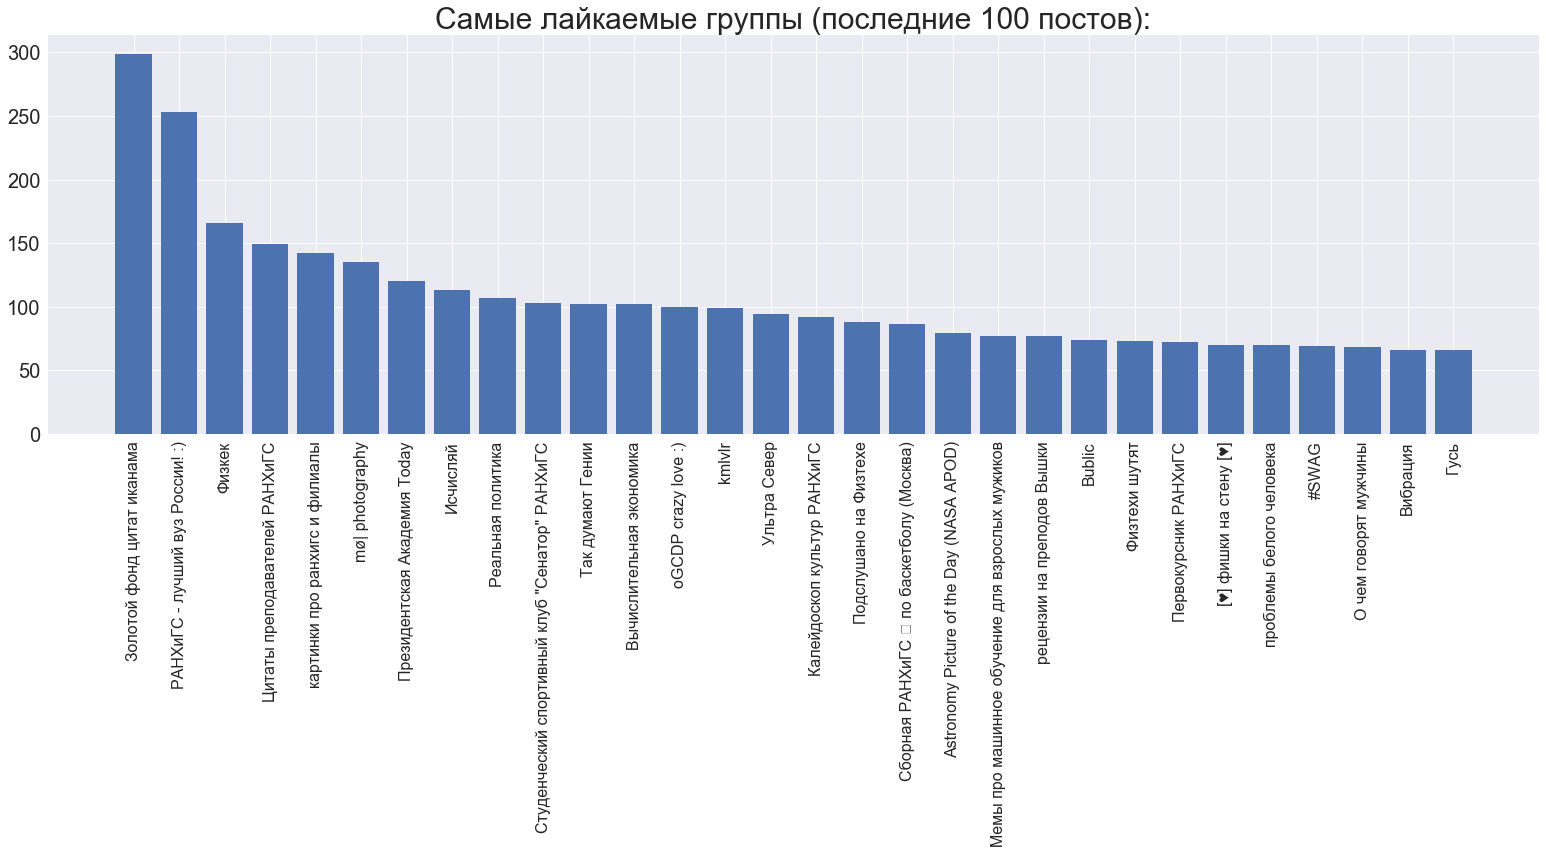

In [38]:
sum_likes = np.sum(L_abs, axis=0)
top_freq_plot(list(zip(group_names, sum_likes)), 'Самые лайкаемые группы (последние 100 постов):')

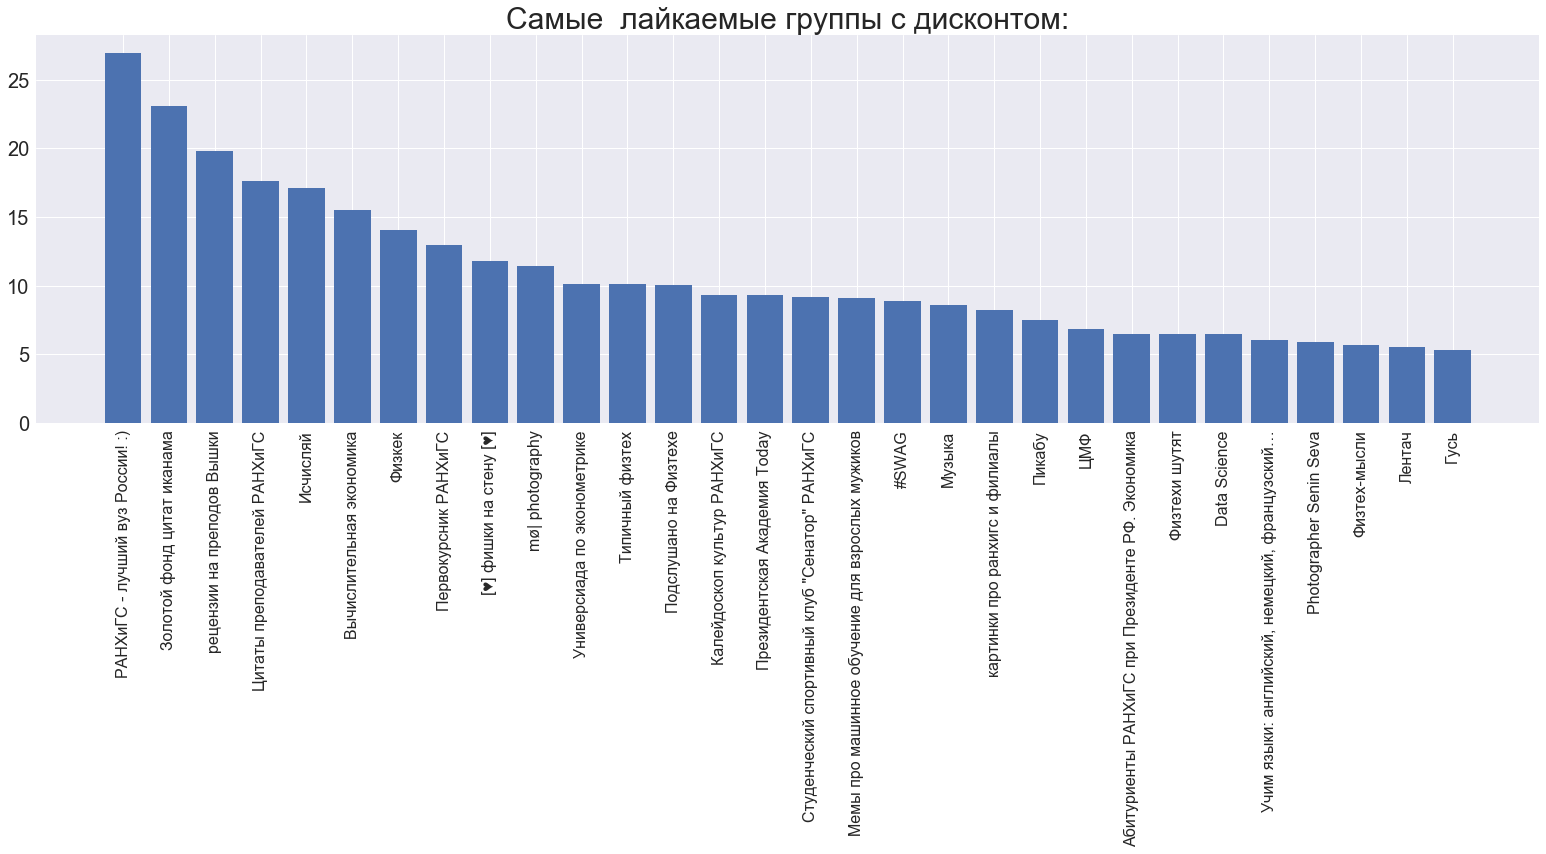

In [39]:
sum_likes = np.sum(L_abs/(np.max(L_abs,axis=1) + 0.0001).reshape(706,1), axis=0)
top_freq_plot(list(zip(group_names, sum_likes)), 'Самые  лайкаемые группы с дисконтом:')

## 7.2 Наиболее часто лайкают паблики

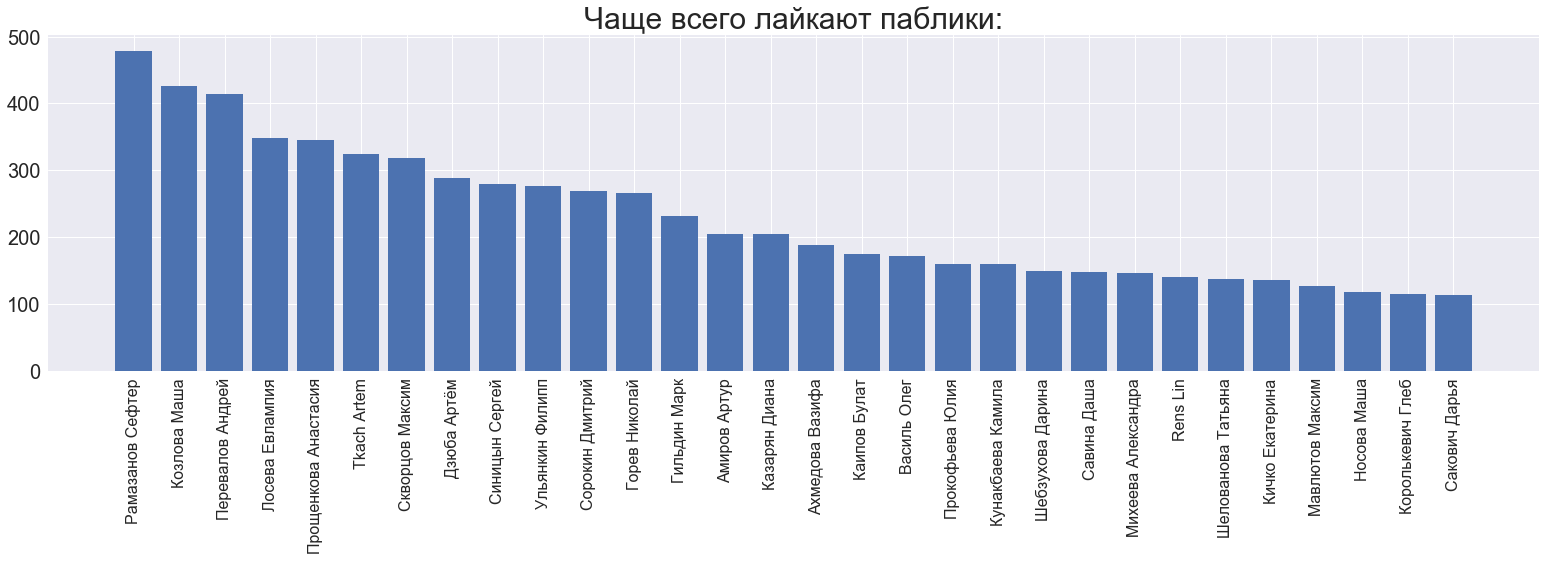

In [40]:
sum_likes = np.sum(L_abs, axis=1)
top_freq_plot(list(zip(users_names, sum_likes)), 'Чаще всего лайкают паблики:', p=8)

## 7.3 Группы, которые лайкают но не подписываются 

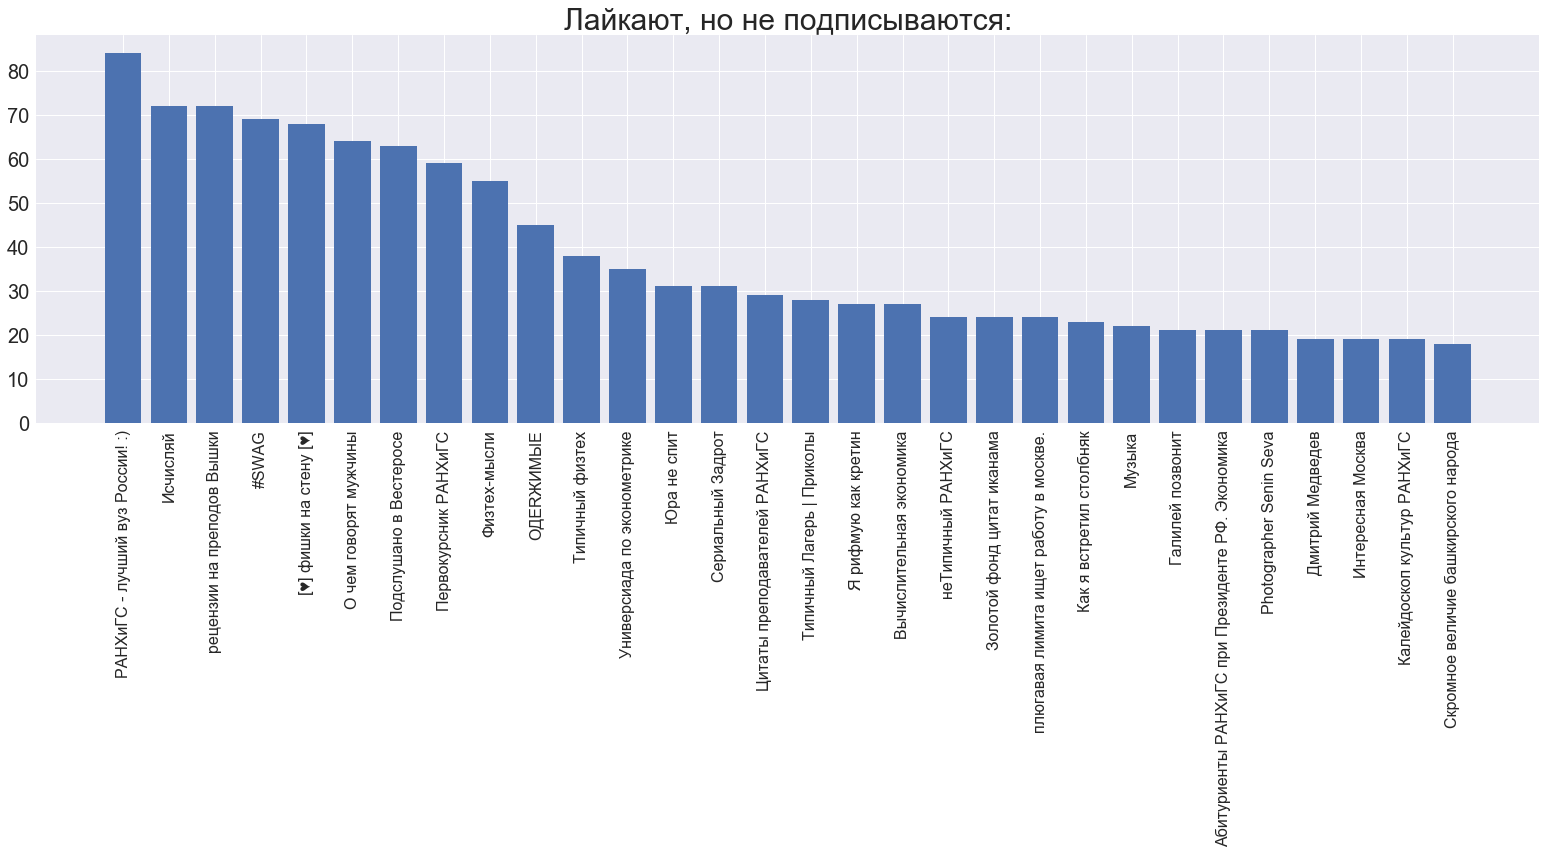

In [41]:
sum_likes = np.sum(L_abs*(1-P_abs), axis=0)
top_freq_plot(list(zip(group_names, sum_likes)), 'Лайкают, но не подписываются:')

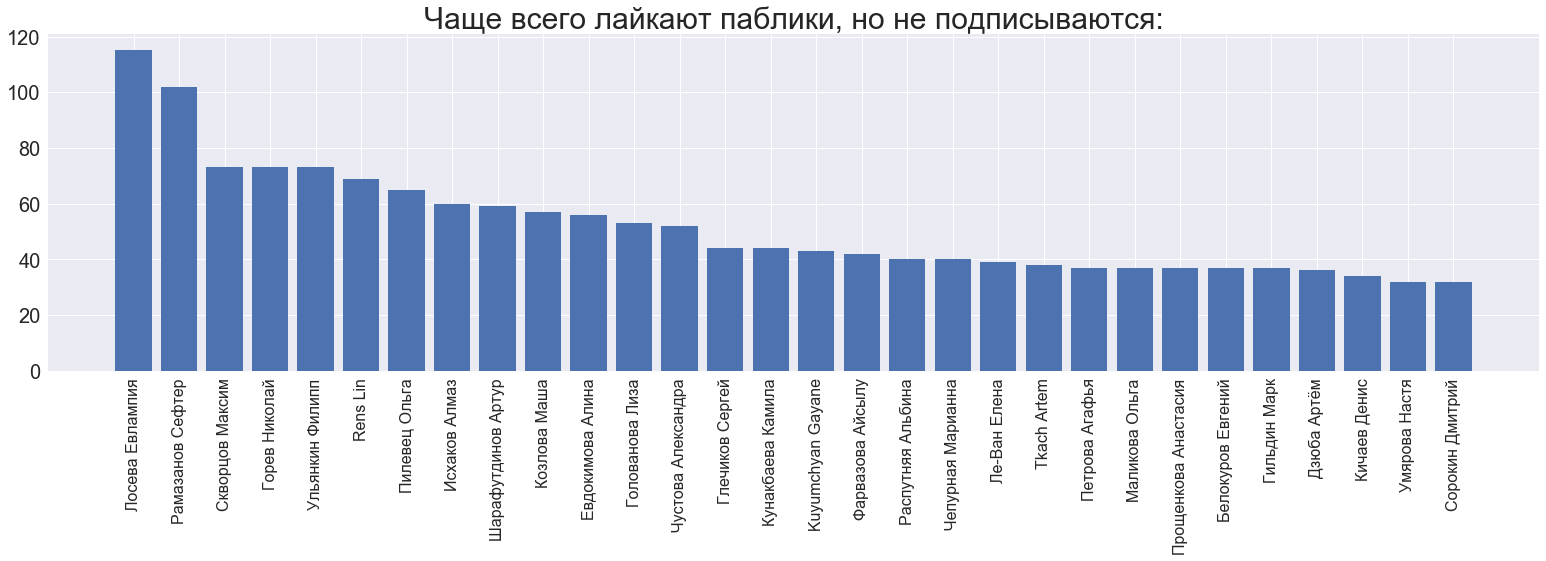

In [42]:
sum_likes = np.sum(L_abs*(1-P_abs), axis=1)
top_freq_plot(list(zip(users_names, sum_likes)), 'Чаще всего лайкают паблики, но не подписываются:', p=8)

## 7.4 Индивидуальные лайк-рейтинги

In [43]:
def like_user(name, L = L_abs, k=20, users_names = users_names, group_names = group_names, users_id=users_id):
    if isinstance(name, str):
        i = users_names.index(name)
    else:
        i = users_id.index(name)
        name = users_names[i]
    likes = L_abs[i,:]
    top_freq_plot(list(zip(group_names, likes)), name + ' лайкает:')
    pass

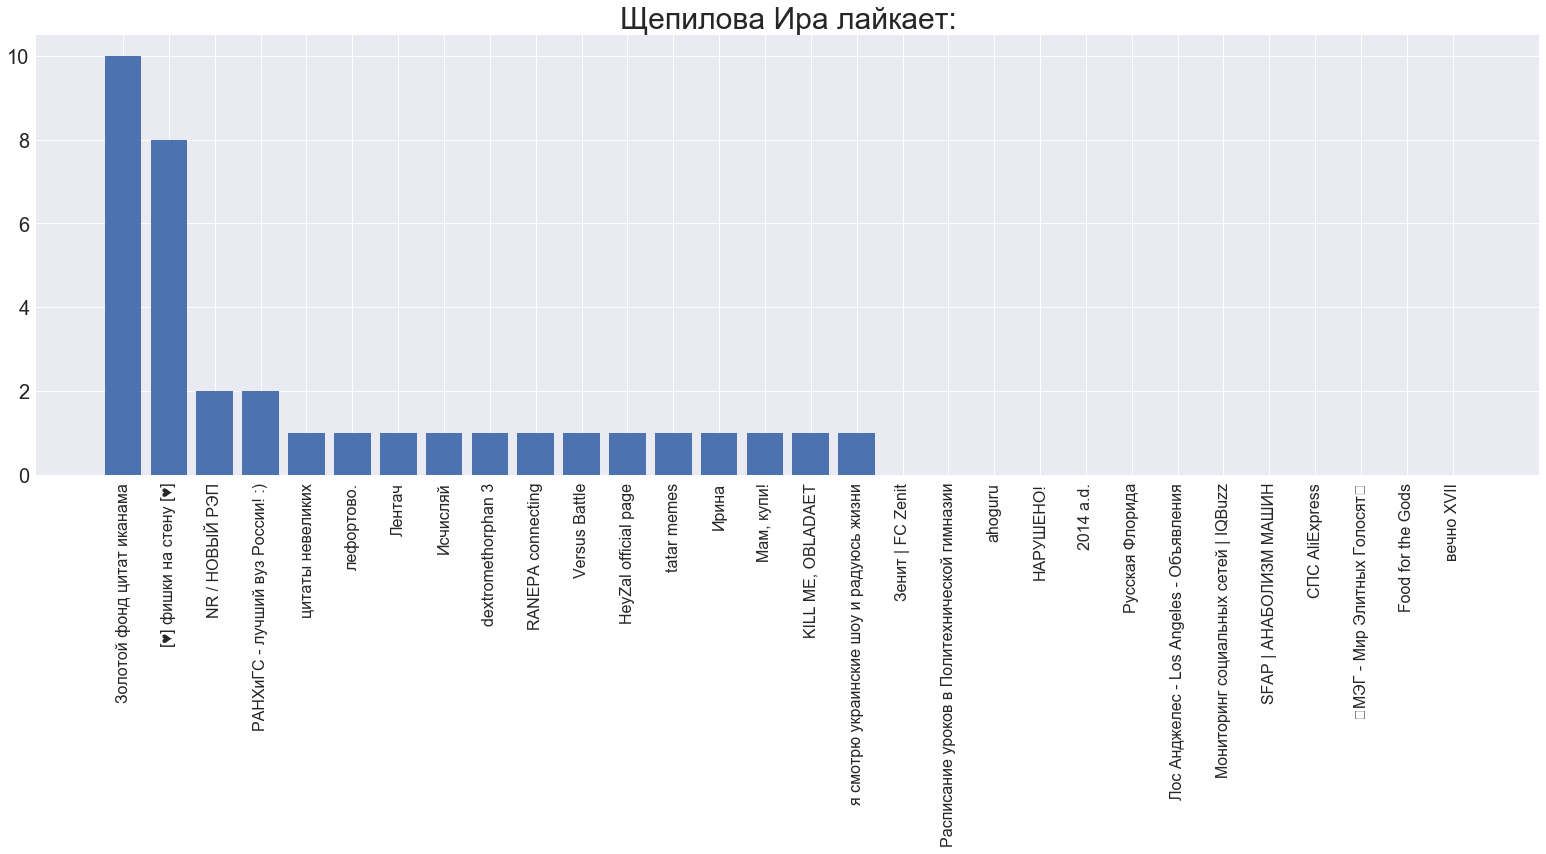

In [44]:
like_user('Щепилова Ира')

# 8. Популярность тематик

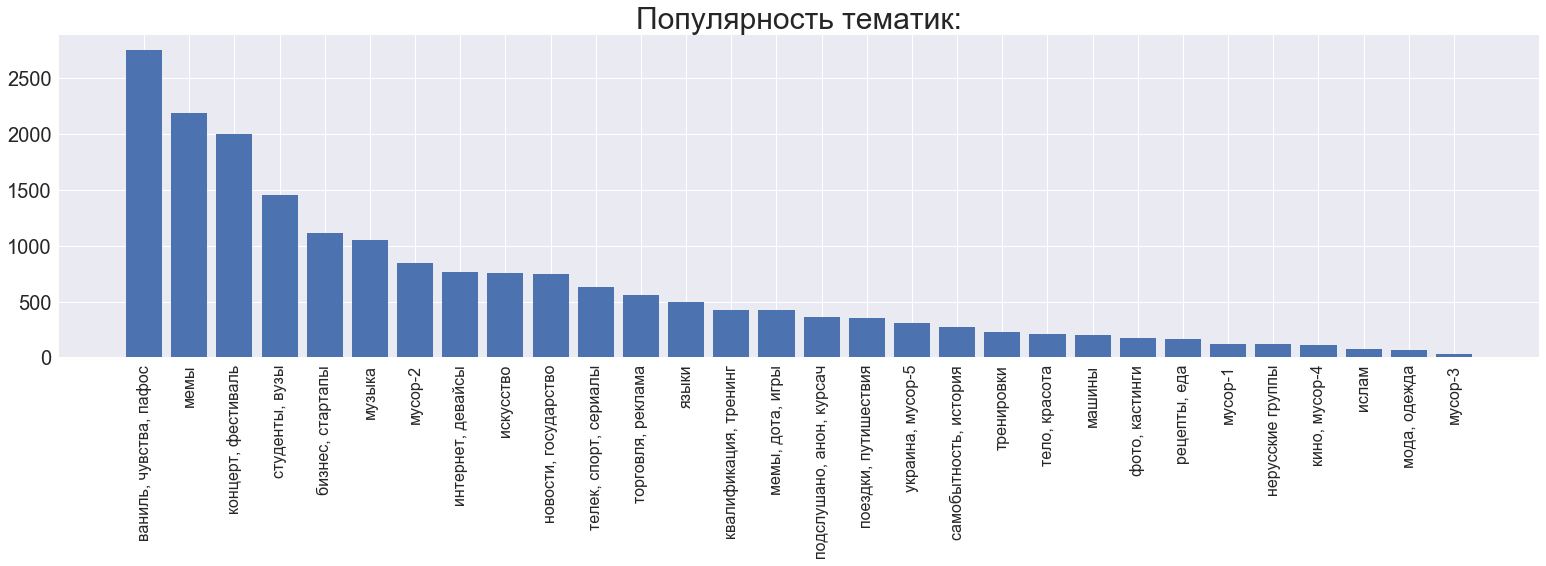

In [45]:
th_popularity = {i : 0 for i in range(30)}   # словарь для лайков

for i in range(L_abs.shape[1]):
    cur_group = groups_id[i]
    cur_likes = np.sum(L_abs[:,i])
    for th in gr_res_30[cur_group]['themes']:
        th_popularity[th[0]] += th[1]*cur_likes
        
top_freq_plot([(themes_30[a],b) for a,b in th_popularity.items()],'Популярность тематик:', p = 8)

# 9. Новая переменная по числу лайков

In [46]:
df_30.shape

(672, 31)

In [47]:
len(sum_likes)

706

In [48]:
sum_likes = np.sum(L_abs, axis=1)
df_pub_likes = pd.DataFrame([[i,j] for i,j in zip(users_id,sum_likes)])
df_pub_likes.columns = ['uid', 'pub_likes_cnt']
df_it = pd.merge(df_30, df_pub_likes, on='uid', how='left')

df_it.to_csv('vk_publ_clust_30_v11-01-18.csv',sep='\t', index=False, header=True)
df_it.head()

,uid,30pub_clust_0,30pub_clust_1,30pub_clust_2,30pub_clust_3,30pub_clust_4,30pub_clust_5,30pub_clust_6,30pub_clust_7,30pub_clust_8,...,30pub_clust_21,30pub_clust_22,30pub_clust_23,30pub_clust_24,30pub_clust_25,30pub_clust_26,30pub_clust_27,30pub_clust_28,30pub_clust_29,pub_likes_cnt
0,22261760,0.10,1.21e-02,1.54e-02,0.02,6.12e-02,4.80e-03,9.21e-03,0.03,6.17e-02,...,1.54e-02,0.05,6.94e-03,1.38e-02,0.02,8.04e-03,2.33e-02,0.01,4.54e-04,12.0
1,295389188,0.11,4.35e-03,2.00e-02,0.03,6.04e-03,3.09e-03,7.98e-03,0.01,1.07e-01,...,4.39e-02,0.01,1.48e-02,1.27e-03,0.03,5.66e-02,4.40e-02,0.02,1.27e-03,12.0
2,174168070,0.10,2.03e-03,9.04e-03,0.04,3.91e-02,5.54e-03,2.27e-02,0.02,2.85e-02,...,6.34e-03,0.07,3.94e-03,3.24e-03,0.01,3.41e-02,1.08e-02,0.10,0.00e+00,15.0
3,137312267,0.11,3.69e-03,2.61e-02,0.02,4.18e-02,4.40e-03,2.63e-02,0.03,5.39e-02,...,7.23e-02,0.04,3.70e-03,8.21e-03,0.04,2.29e-02,1.93e-02,0.03,2.47e-04,14.0
4,47220748,0.09,2.67e-04,2.49e-02,0.02,2.41e-03,2.72e-03,1.02e-01,0.07,3.43e-03,...,6.28e-04,0.03,0.00e+00,0.00e+00,0.14,1.47e-02,6.74e-03,0.13,0.00e+00,18.0


<img align="center" src="https://raw.githubusercontent.com/FUlyankin/Parsers/master/images%20/cats.jpg" height="1200" width="1200"> 